# Dataset : bioinf.nl/~davelangers/datasets/possum.zip

In [1]:
import pandas as pd
df = pd.read_csv("possum.csv").dropna()

In [2]:
y = df.age.values.reshape(-1,1)
y

array([[8.],
       [6.],
       [6.],
       [6.],
       [2.],
       [1.],
       [2.],
       [6.],
       [9.],
       [6.],
       [9.],
       [5.],
       [5.],
       [3.],
       [5.],
       [4.],
       [1.],
       [2.],
       [5.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [3.],
       [7.],
       [2.],
       [4.],
       [3.],
       [2.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [7.],
       [2.],
       [7.],
       [1.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [5.],
       [4.],
       [5.],
       [5.],
       [6.],
       [3.],
       [7.],
       [2.],
       [3.],
       [4.],
       [3.],
       [2.],
       [2.],
       [7.],
       [3.],
       [6.],
       [3.],
       [5.],
       [3.],
       [4.],
       [5.],
       [5.],
       [7.],
       [6.],
       [1.],
       [1.],
       [4.],
       [6.],
       [5.],
       [6.],
       [1.],
       [1.],
       [1.],

In [3]:
sex = (df.sex.values == "m") + 0.
sex = sex.reshape(-1,1)
sex

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [4]:
import numpy as np
x = np.hstack((df.iloc[:,5:].values, sex))
x

array([[94.1, 60.4, 89. , ..., 28. , 36. ,  1. ],
       [92.5, 57.6, 91.5, ..., 28.5, 33. ,  0. ],
       [94. , 60. , 95.5, ..., 30. , 34. ,  0. ],
       ...,
       [92.4, 55. , 89. , ..., 25. , 30. ,  0. ],
       [91.5, 55.2, 82.5, ..., 25. , 29. ,  1. ],
       [93.6, 59.9, 89. , ..., 28.5, 33.5,  0. ]])

In [5]:
# standard scaler
mu = x.mean(axis = 0)
sigma = x.std(axis = 0)
x = (x - mu)/sigma

## Deep learning

In [6]:
import tensorflow
from tensorflow import keras

In [7]:
neural = keras.models.Sequential()
neural.add(keras.layers.InputLayer(input_shape=(10,)))
neural.add(keras.layers.Dense(units=64,activation=keras.activations.relu, name= "hidden_1"))
neural.add(keras.layers.Dense(units=16,activation=keras.activations.relu, name= "hidden_2"))
neural.add(keras.layers.Dense(units=1,activation=keras.activations.linear, name= "output")) # output cannot be negative
neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 64)                704       
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                1040      
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


2022-06-20 10:45:50.300678: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-20 10:45:50.379055: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2500000000 Hz
2022-06-20 10:45:50.416488: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55add675c400 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-20 10:45:50.416541: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [8]:
neural.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD() 
)
neural.fit(
    x = x,
    y = y,
    epochs = 1,
    verbose = 0
)

In [9]:
neural.evaluate(x,y)

4/4 [==============================] - 0s 756us/step - loss: 10.5341


10.534116744995117

In [10]:
yhat = neural.predict(x)

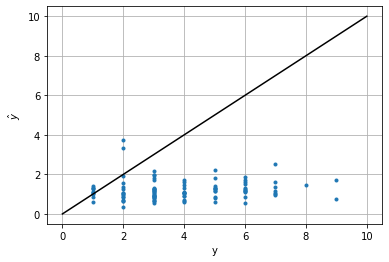

In [11]:
import matplotlib.pyplot as plt
plt.plot(y,yhat,".")
plt.plot([0,10],[0,10],'-k')
plt.xlabel("y")
plt.ylabel("$\hat{y}$")
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(f'r2 = {r2_score(y_true=y,y_pred = yhat)}')
print(f'MAE = {mean_absolute_error(y_true=y,y_pred = yhat)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_true=y,y_pred = yhat)):.3f} yr')


r2 = -1.9006784758454471
MAE = 2.697878907222559
RMSE = 3.246 yr


# Machine learning (Numpy)


In [13]:
design = np.hstack((np.ones((101,1)),x))
coefs = np.linalg.solve(design.T @ design,design.T@y)
yhat = design@coefs


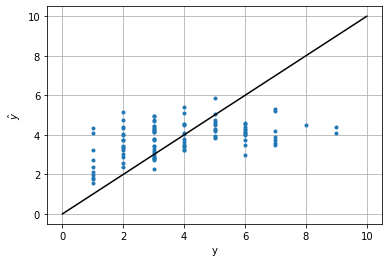

In [14]:
plt.plot(y,yhat,".")
plt.plot([0,10],[0,10],'-k')
plt.xlabel("y")
plt.ylabel("$\hat{y}$")
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(f'r2 = {r2_score(y_true=y,y_pred = yhat):.3f} yr')
print(f'MAE = {mean_absolute_error(y_true=y,y_pred = yhat):.3f} yr')
print(f'RMSE = {np.sqrt(mean_squared_error(y_true=y,y_pred = yhat)):.3f} yr')

r2 = 0.199 yr
MAE = 1.363 yr
RMSE = 1.706 yr
